In [ ]:
import tarfile
import re
from datetime import datetime
import math
import seaborn as sns
import pandas as pd
import json
import numpy as np
import pickle
sns.set()
# Apply the default theme
sns.set_theme()
def remap_keys(mapping):
    return [{'key':k, 'value': v} for k, v in mapping.items()]

In [ ]:
import networkx as nx

In [ ]:
content = pd.read_csv('/content/drive/MyDrive/cleaned_data')

In [ ]:
content.head(10)

,Unnamed: 0,path_email,date,day_name,date_id,week,From,To,X-From,X-To,id-X-From,id-X-To
0,0,maildir/blair-l/sent_items/604.,2001-08-02,5,1007 days,143,lynn.blair@enron.com,shelley.corman@enron.com,blair lynn,corman shelley,1080,2193
1,1,maildir/blair-l/sent_items/318.,2001-10-24,4,1090 days,155,lynn.blair@enron.com,e..anderson@enron.com,blair lynn,anderson e gary,1080,391
2,2,maildir/blair-l/sent_items/354.,2001-05-31,5,944 days,134,lynn.blair@enron.com,sharon.brown@enron.com,blair lynn,brown sharon,1080,1408
3,3,maildir/blair-l/sent_items/169.,2001-10-01,2,1067 days,152,lynn.blair@enron.com,britt.davis@enron.com,blair lynn,britt davis,1080,1370
4,4,maildir/blair-l/sent_items/388.,2001-06-06,4,950 days,135,lynn.blair@enron.com,jerry.wilkens@enron.com,blair lynn,jerry wilkens,1080,4492
5,5,maildir/blair-l/sent_items/388.,2001-06-06,4,950 days,135,lynn.blair@enron.com,john.buchanan@enron.com,blair lynn,buchanan john,1080,1465
6,6,maildir/blair-l/sent_items/388.,2001-06-06,4,950 days,135,lynn.blair@enron.com,terry.kowalke@enron.com,blair lynn,kowalke terry,1080,5063
7,7,maildir/blair-l/sent_items/473.,2001-07-02,2,976 days,139,lynn.blair@enron.com,larry.berger@enron.com,blair lynn,berger larry,1080,944
8,9,maildir/blair-l/sent_items/473.,2001-07-02,2,976 days,139,lynn.blair@enron.com,michael.bodnar@enron.com,blair lynn,bodnar michael,1080,1140
9,10,maildir/blair-l/sent_items/473.,2001-07-02,2,976 days,139,lynn.blair@enron.com,ava.garcia@enron.com,blair lynn,ava garcia,1080,660


In [ ]:
import pickle
with open('/content/drive/MyDrive/dict_id_name.p', 'rb') as fp:
    dict_id_name = pickle.load(fp)

In [ ]:
dict_id_name_inverted = {v: k for k, v in dict_id_name.items()}

In [ ]:
dict_id_name_inverted[11]

'a adams aguayo allen anderson ann bell bianca bob bowen brewer cason celeste cisneros diane dianne fischer garcia hundl hunter janie jason jean joe jorge julie kim kimberly kimberly larry laurel melinda melissa melissa murphy ornelas piwetz rodriguez s seib sharen stephanie theriot tiffany whalen william williams'

In [ ]:
dict_id_name_inverted[0]

''

In [ ]:
def to_csv(data):
  columns_key = []
  columns_key_name = []
  columns_key_1 = []
  columns_key_1_name = []
  columns_key_2 = []
  columns_key_2_name = []
  columns_key_3 = []
  columns_key_3_name = []
  columns_value = []
  for key in data:
    if type(key) == tuple:
      if len(key) == 2:
        columns_key_1.append(key[0])
        columns_key_2.append(key[1])
        columns_key_1_name.append(dict_id_name_inverted[key[0]])
        columns_key_2_name.append(dict_id_name_inverted[key[1]])
        columns_value.append(data[key])
      else:
        columns_key_1.append(key[0])
        columns_key_2.append(key[1])
        columns_key_3.append(key[2])
        columns_key_1_name.append(dict_id_name_inverted[key[0]])
        columns_key_2_name.append(dict_id_name_inverted[key[1]])
        columns_key_3_name.append(dict_id_name_inverted[key[2]])
        columns_value.append(data[key])
    else:
      columns_key.append(key)
      columns_key_name.append(dict_id_name_inverted[key])
      columns_value.append(data[key])


  if columns_key :
    pd.DataFrame({
        "id_person" : columns_key,
        "name_person" : columns_key_name,
        "mean_of_interlocutors" : columns_value,
    }).to_csv('/content/drive/MyDrive/Q1_1.csv')
  elif columns_key_3 :
      pd.DataFrame({
        "id_person_1" : columns_key_1,
        "id_person_2" : columns_key_2,
        "id_person_3" : columns_key_3,

        "name_person_1" : columns_key_1_name,
        "name_person_2" : columns_key_2_name,
        "name_person_3" : columns_key_3_name,
        "trinome": zip(columns_key_1_name,columns_key_2_name,columns_key_3_name),
        "mean_of_message_per_week" : columns_value,
    }).to_csv('/content/drive/MyDrive/Q1_2_3_.csv')
  else:
    pd.DataFrame({
        "id_person_1" : columns_key_1,
        "id_person_2" : columns_key_2,
        "name_person_1" : columns_key_1_name,
        "name_person_2" : columns_key_2_name,
        "binome": zip(columns_key_1_name,columns_key_2_name),
        "betweenness_centrality" : columns_value,
    }).to_csv('/content/drive/MyDrive/betweenness_centrality_for_binome.csv')

In [ ]:
with open('/content/drive/MyDrive/Q1_1.p', 'rb') as fp:
    mean_of_interlocutors_foreach_person = pickle.load(fp)
to_csv(mean_of_interlocutors_foreach_person)

In [ ]:
with open("/content/drive/MyDrive/Q1_2.p",'rb') as fp:
  my_binomes = pickle.load(fp)
to_csv(my_binomes)

In [ ]:
max(my_binomes.values())

26.0

In [ ]:
with open("/content/drive/MyDrive/Q1_3.p",'rb') as fp:
  my_trinomes = pickle.load(fp)
to_csv(my_trinomes)

In [ ]:
connection = set(content[['id-X-From','id-X-To']].itertuples(index=False, name=None))

In [ ]:
nodes = []
for instance in connection:
  if instance[0] not in nodes:
    nodes.append(instance[0])
  if instance[1] not in nodes:
    nodes.append(instance[1])
nodes = list(set(sorted(nodes)))

## ***Question 2.1. Pour chaque collaborateur d’Enron, quel est en moyenne son indice de betweenness centrality pendant une semaine de travail?***

In [ ]:
G=nx.Graph()
G.add_edges_from(connection)

In [ ]:


betweenness_centrality_connection = nx.betweenness_centrality(G)


betweenness_centrality_connection

{1904: 0.05489039101391703,
 4426: 0.0,
 3585: 0.0545750481762498,
 4753: 0.0,
 2950: 0.007580507624813369,
 3488: 0.00013497927033720965,
 4698: 0.08399142490150595,
 873: 0.053232392700962576,
 2451: 0.005534432629619184,
 394: 0.0,
 3686: 0.0,
 4209: 0.017677482968236555,
 416: 0.0004377521621643197,
 1635: 0.010090962096635778,
 1003: 1.6970069889063668e-05,
 3075: 0.020354262650212573,
 4651: 0.008437468100180631,
 4212: 0.09753328022246308,
 3868: 0.0,
 3947: 0.01704161790150844,
 187: 6.681930011705538e-05,
 924: 0.020663834548052498,
 1665: 0.0,
 1080: 0.03024559183902066,
 4393: 2.058145510057477e-06,
 3785: 0.010790368651442447,
 88: 1.6709208964866927e-05,
 1598: 0.007010799450832995,
 4090: 0.0,
 4151: 0.012530436356792943,
 4383: 0.0013041143653542385,
 2458: 0.024900977817286157,
 4719: 0.0,
 4854: 4.244536356607504e-06,
 5011: 0.019543526014147085,
 1040: 0.0030039910065951638,
 2639: 1.4852523522617328e-05,
 3537: 0.023147424052961278,
 5621: 0.0,
 2512: 0.0247290349562

In [ ]:
max(dict(G.degree).values())

562

In [ ]:
{ k: dict(G.degree)[k] for k in dict(G.degree) if dict(G.degree)[k] == 517}

{}

In [ ]:
len(connection)

19216

In [ ]:
len(my_binomes)

214

In [ ]:
len(my_trinomes)

286

In [ ]:
dict(G.degree)

{3100: 57,
 3018: 2,
 3586: 354,
 3406: 12,
 4694: 562,
 6352: 2,
 2514: 274,
 1911: 3,
 2970: 253,
 4894: 6,
 4105: 156,
 5728: 1,
 3250: 51,
 2962: 8,
 1904: 341,
 3379: 3,
 5488: 70,
 4375: 35,
 3079: 222,
 865: 4,
 1277: 47,
 4678: 93,
 1573: 132,
 5494: 1,
 6432: 125,
 4180: 6,
 4061: 103,
 4205: 554,
 6309: 1,
 293: 189,
 3784: 145,
 2481: 529,
 2902: 1,
 597: 187,
 2475: 15,
 4367: 33,
 2695: 1,
 3945: 222,
 1245: 31,
 5483: 336,
 4208: 385,
 6085: 2,
 4800: 120,
 1530: 27,
 5727: 42,
 5596: 4,
 4156: 101,
 1428: 1,
 2359: 270,
 5356: 10,
 46: 2,
 6285: 2,
 3029: 9,
 3453: 68,
 6152: 2,
 3047: 1,
 3940: 203,
 5516: 6,
 2469: 137,
 2518: 1,
 3530: 1,
 704: 415,
 1783: 2,
 5557: 118,
 166: 1,
 4079: 31,
 427: 4,
 5100: 83,
 2465: 10,
 4867: 369,
 5906: 1,
 1285: 7,
 483: 3,
 4951: 268,
 4328: 10,
 5306: 74,
 584: 16,
 3347: 131,
 4184: 4,
 458: 114,
 3713: 10,
 3955: 3,
 809: 130,
 3004: 5,
 5451: 135,
 2399: 5,
 5325: 289,
 4246: 4,
 5105: 2,
 996: 5,
 3905: 4,
 1471: 7,
 675: 2,

In [ ]:
def normalize(node,ens):
  min_val = min(ens.values())
  max_val = max(ens.values())
  return (ens[node] -min_val) / (max_val-min_val)

In [ ]:
g_degree_normalized = {}
for node in nodes:
  g_degree_normalized.update(
    {
      node : normalize(node,dict(G.degree))
    }
  )

In [ ]:
betweenness_centrality_connection_normalized = {}
for node in nodes:
  betweenness_centrality_connection_normalized.update(
    {
      node : normalize(node,betweenness_centrality_connection)
    }
  )

In [ ]:
x_data=[]
y_data=[]
for node in nodes:
  x_data.append(g_degree_normalized[node])
  y_data.append(betweenness_centrality_connection_normalized[node])

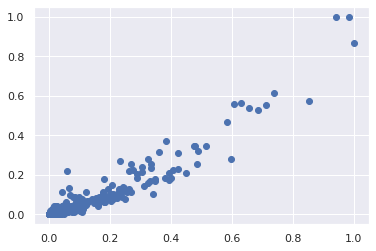

In [ ]:
import matplotlib.pylab as plt

plt.scatter(x_data, y_data)
plt.show()

In [ ]:
 pd.DataFrame({
        "betweenness_centrality_normalized" : x_data,
        "degree_normalized" : y_data
    }).to_csv('/content/drive/MyDrive/Q2_1_betweenness.csv')

In [ ]:
simrank_similarity = nx.simrank_similarity(G)

In [ ]:
with open('/content/drive/MyDrive/simrank_similarity.p', 'wb') as fp:
    pickle.dump(simrank_similarity, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('/content/drive/MyDrive/simrank_similarity.json', 'w') as fp:
    json.dump(simrank_similarity, fp)


## ***• Question 2.2. Même question que 2.1 en remplaçant un collaborateur par un binôme, un trinôme, un groupe de 4, 5, . .***

In [ ]:
edges_my_binomes = []
for idx_1,binome_node in enumerate(my_binomes):
  for idx_2,binome_node_2 in enumerate(my_binomes):
    if binome_node[0] in binome_node_2 or binome_node[1] in binome_node_2:
      if (binome_node,binome_node_2) not in edges_my_binomes and (binome_node_2, binome_node) not in edges_my_binomes:
        edges_my_binomes.append((binome_node,binome_node_2))

In [ ]:
edges_my_binomes

[((706, 3815), (706, 3815)),
 ((1527, 2358), (1527, 2358)),
 ((1527, 2358), (1527, 656)),
 ((1635, 3352), (1635, 3352)),
 ((1635, 3352), (1635, 2161)),
 ((1635, 3352), (1635, 3894)),
 ((1635, 3352), (1635, 6340)),
 ((1635, 3352), (1635, 2721)),
 ((1635, 3352), (1635, 5281)),
 ((4871, 1102), (4871, 1102)),
 ((4871, 1102), (4871, 4256)),
 ((4871, 1102), (4871, 3743)),
 ((4871, 1102), (4871, 6347)),
 ((4871, 1102), (4871, 1046)),
 ((4871, 1102), (4871, 914)),
 ((4871, 1102), (4871, 3608)),
 ((4871, 1102), (4871, 6441)),
 ((4871, 1102), (4871, 658)),
 ((4871, 1102), (4871, 5572)),
 ((4871, 1102), (4871, 1324)),
 ((4871, 1102), (4871, 140)),
 ((4871, 1102), (4871, 4275)),
 ((4871, 1102), (4871, 1631)),
 ((4871, 1102), (4871, 1624)),
 ((4871, 1102), (4871, 6309)),
 ((4871, 1102), (4871, 6410)),
 ((4871, 1102), (4871, 4437)),
 ((4871, 1102), (4871, 2653)),
 ((4871, 1102), (4871, 1861)),
 ((4871, 1102), (4871, 2721)),
 ((4871, 1102), (4871, 2521)),
 ((4871, 4256), (4871, 4256)),
 ((4871, 4256)

In [ ]:
G=nx.Graph()
G.add_edges_from(edges_my_binomes)

In [ ]:

betweenness_centrality_binomes = nx.betweenness_centrality(G)

betweenness_centrality_binomes

{(706, 3815): 0.0,
 (1527, 2358): 0.0,
 (1527, 656): 0.0004346881112801565,
 (1635, 3352): 0.0,
 (1635, 2161): 0.0,
 (1635, 3894): 0.0,
 (1635, 6340): 0.0,
 (1635, 2721): 0.005216257335361878,
 (1635, 5281): 0.0,
 (4871, 1102): 0.0,
 (4871, 4256): 0.0,
 (4871, 3743): 0.0,
 (4871, 6347): 0.0,
 (4871, 1046): 0.0,
 (4871, 914): 0.0,
 (4871, 3608): 0.0,
 (4871, 6441): 0.0,
 (4871, 658): 0.0,
 (4871, 5572): 0.0,
 (4871, 1324): 0.0,
 (4871, 140): 0.0,
 (4871, 4275): 0.002347315800912845,
 (4871, 1631): 0.0,
 (4871, 1624): 0.0,
 (4871, 6309): 0.0,
 (4871, 6410): 0.0,
 (4871, 4437): 0.0,
 (4871, 2653): 0.0,
 (4871, 1861): 0.0,
 (4871, 2721): 0.00599869593566616,
 (4871, 2521): 0.0,
 (811, 3132): 0.0,
 (811, 2215): 0.0,
 (2357, 2479): 0.003086285590089111,
 (2357, 3647): 0.0,
 (2479, 145): 0.0,
 (2479, 147): 0.0,
 (2479, 59): 0.0,
 (2357, 5414): 0.0,
 (2357, 6166): 0.0001956096500760704,
 (2479, 3692): 0.0,
 (2479, 6166): 0.0001521408389480548,
 (2357, 5893): 0.0,
 (2479, 4868): 0.0,
 (2357, 42

In [ ]:
to_csv(betweenness_centrality_binomes)

In [ ]:
 pd.DataFrame({
        "betweenness_centrality_normalized" : x_data,
        "degree_normalized" : y_data
    }).to_csv('/content/drive/MyDrive/Q2_1_betweenness_binome.csv')

In [ ]:
betweenness_centrality_binome_normalized = {}
for node in nodes:
  betweenness_centrality_binome_normalized.update(
    {
      node : normalize(node,betweenness_centrality_binomes)
    }
  )

## ***• Question 1.4. Mêmes questions que 1.2 et 1.3 en remplaçant binôme par trinôme, par groupe de 4, 5, . . .***